In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

In [2]:
df=pd.read_csv(r"C:\Users\prath\prathik ranka\python\simple programs\sapm mail detector\spam.csv", encoding='latin')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


1. DATA CLEANING


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.duplicated().sum()

403

In [7]:
df.drop_duplicates(inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
df['target']=le.fit_transform(df['target'])
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


2.   EDA


In [10]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

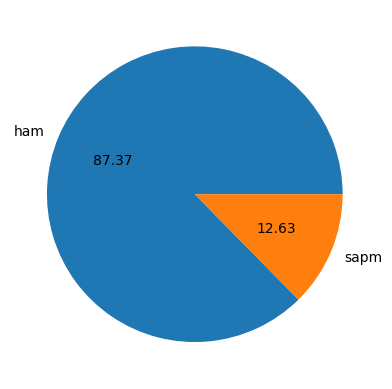

In [11]:
plt.pie(df['target'].value_counts(),labels=['ham','sapm'],autopct="%0.2f")
plt.show()

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download("punkt_tab")
nltk.download('stopwords')
ps=PorterStemmer()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df['char_count']=df['text'].apply(len)
df

,target,text,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [14]:
df['word_count']=df['text'].apply(lambda x :len(nltk.word_tokenize(x)))
df

,target,text,char_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [15]:
df['sent_count']=df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))
df

,target,text,char_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


3.DATA PROCESSING
    lower case
    tokenization
    remove special char and stop words punctuation

In [16]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    z=[]
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:
            z.append(i)

    y.clear()        
    for i in z:
        y.append(ps.stem(i))

    return " ".join(y)

In [17]:
transform_text("iou. 450v @$R% sir 32#.  hi how are you jonase are you enjoying the movie and i loved being with you till the end")

'iou 450v r sir 32 hi jonas enjoy movi love till end'

In [18]:
ps.stem("texted")

'text'

In [140]:
df['transformed text']=df['text'].apply(transform_text)
df

,target,text,char_count,word_count,sent_count,transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [23]:
sapm_word=[]
for mas in df[df['target']==1]['transformed text'].tolist():
    for word in mas.split():
        sapm_word.append(word)

In [24]:
len(sapm_word)

9939

In [35]:
ham_word=[]
for mas in df[df['target']==0]['transformed text'].tolist():
    for word in mas.split():
        ham_word.append(word)

In [39]:
from collections import Counter
pd.DataFrame(Counter(sapm_word).most_common(45)).head(10)

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [38]:
from collections import Counter
pd.DataFrame(Counter(ham_word).most_common(45)).head(10)

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


4.  MODEL BUILDING

In [120]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [141]:
x=tfidf.fit_transform(df['transformed text']).toarray()

In [122]:
x.shape

(5169, 6708)

In [123]:
y=df['target']

In [124]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int32

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix     
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [143]:
len(xtrain)

4135

In [144]:
len(xtest)

1034

In [145]:
len(ytrain)

4135

In [146]:
len(ytest)

1034

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [148]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [149]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [150]:
def train_data(model,xtrain,ytrain,xtest,ytest):
    model.fit(xtrain,ytrain)
    y_pred=model.predict(xtest)
    accuracy=accuracy_score(ytest,y_pred)
    precision=precision_score(ytest,y_pred)

    return accuracy,precision

In [151]:
train_data(xgb,xtrain,ytrain,xtest,ytest)

(0.9584139264990329, 0.9081632653061225)

In [135]:
acc_score=[]
prec_score=[]

for name, clf in clfs.items():
    curr_acc,curr_prec=train_data(clf,xtrain,ytrain,xtest,ytest)

    print("name-->",name)
    print("accuracy-->",curr_acc)
    print("precision-->",curr_prec)

    acc_score.append(curr_acc)
    prec_score.append(curr_prec)

name--> SVC
accuracy--> 0.9206963249516441
precision--> 0.6742424242424242
name--> KN
accuracy--> 0.9187620889748549
precision--> 1.0
name--> NB
accuracy--> 0.971953578336557
precision--> 0.8721804511278195
name--> DT
accuracy--> 0.9226305609284333
precision--> 0.875
name--> LR
accuracy--> 0.971953578336557
precision--> 0.9459459459459459
name--> RF
accuracy--> 0.9729206963249516
precision--> 1.0


c:\Users\prath\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


name--> AdaBoost
accuracy--> 0.9545454545454546
precision--> 0.8857142857142857
name--> BgC
accuracy--> 0.965183752417795
precision--> 0.9035087719298246
name--> ETC
accuracy--> 0.9748549323017408
precision--> 0.9811320754716981
name--> GBDT
accuracy--> 0.9458413926499033
precision--> 0.9
name--> xgb
accuracy--> 0.965183752417795
precision--> 0.9339622641509434


In [136]:
preformane=pd.DataFrame({'algorithm':clfs.keys(),'accuracy':acc_score,'precision':prec_score})
preformane.sort_values('accuracy')

,algorithm,accuracy,precision
1,KN,0.918762,1.000000
0,SVC,0.920696,0.674242
3,DT,0.922631,0.875000
9,GBDT,0.945841,0.900000
6,AdaBoost,0.954545,0.885714
7,BgC,0.965184,0.903509
10,xgb,0.965184,0.933962
2,NB,0.971954,0.872180
4,LR,0.971954,0.945946
5,RF,0.972921,1.000000


In [152]:
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(accuracy_score(ytest,ypred))
print(precision_score(ytest,ypred))

0.9477756286266924
0.9726027397260274


In [153]:
import pickle
pickle.dump(model,open("model.pkl",'wb'))
pickle.dump(tfidf,open('vectorizer.pkl','wb'))